In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import warnings
warnings.filterwarnings("ignore")

In [52]:
volumes = pd.read_csv('Data/stock_volumes.csv', index_col = 'date', parse_dates = True)
prices = pd.read_csv('Data/stock_prices.csv', index_col = 'date', parse_dates = True)
info = pd.read_csv('Data/stock_info.csv')
sp_listings = pd.read_csv('Data/sp500_listings.csv')                   

In [53]:
#7,914 monthly periods and 1,242 stocks
print(f'volumes df shape: {volumes.shape}\n prices df shape: {prices.shape}')

volumes df shape: (7914, 1241)
 prices df shape: (7914, 1241)


In [54]:
#188,872 listings in total
print(f'sp_listings df shape: {sp_listings.shape}')

sp_listings df shape: (188872, 2)


In [55]:
info[info['ESTAT'] == 'ACT.']

,Instrument,MNEM,RIC,ISIN,NAME,ESTAT
4,916328,U:ABT,ABT,US0028241000,ABBOTT LABORATORIES,ACT.
6,936365,@AMD,AMD.O,US0079031078,ADVANCED MICRO DEVICES,ACT.
10,905271,U:APD,APD,US0091581068,AIR PRDS.& CHEMS.,ACT.
14,905113,U:HWM,HWM,US4432011082,HOWMET AEROSPACE,ACT.
18,905802,U:HES,HES,US42809H1077,HESS,ACT.
...,...,...,...,...,...,...
1236,131745,@PENN,PENN.O,US7075691094,PENN NAT.GAMING,ACT.
1237,69487D,@NXPI,NXPI.O,NL0009538784,NXP SEMICONDUCTORS,ACT.
1238,68157P,U:GNRC,GNRC.K,US3687361044,GENERAC HOLDINGS,ACT.
1239,9110RA,@CZR,CZR.O,US12769G1004,CAESARS ENTERTAINMENT,ACT.


In [56]:
prices.columns

Index(['905270', '921795', '904261', '905261', '916328', '923024', '936365',
       '902355', '912215', '929813',
       ...
       '9889RL', '69568X', '543755', '77463M', '29235J', '131745', '69487D',
       '68157P', '9110RA', '292703'],
      dtype='object', length=1241)

In [57]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#Data frame to hold returns
daily_r = prices.copy(deep = True)

#Convert prices into daily returns
for col in daily_r.columns:
    daily_r[col] = daily_r[col].pct_change()*100

In [59]:
prices.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,22.75,12.63,30.00,29.61,3.8736,11.00,4.1250,24.50,58.00,19.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,22.56,12.57,31.50,29.37,3.8876,11.00,4.0000,24.50,57.75,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,22.38,12.41,32.25,28.89,3.8806,11.38,3.9375,24.63,57.88,18.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,21.81,12.60,32.13,28.41,3.8387,11.50,3.8125,24.75,57.50,18.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,22.25,12.49,32.13,29.13,3.8387,11.50,3.8125,25.00,57.75,19.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
daily_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.835165,-0.475059,5.000000,-0.810537,0.361421,0.000000,-3.030303,0.000000,-0.431034,-1.315789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04,-0.797872,-1.272872,2.380952,-1.634321,-0.180060,3.454545,-1.562500,0.530612,0.225108,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05,-2.546917,1.531023,-0.372093,-1.661475,-1.079730,1.054482,-3.174603,0.487211,-0.656531,-1.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08,2.017423,-0.873016,0.000000,2.534319,0.000000,0.000000,0.000000,1.010101,0.434783,3.405405,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
#Resample to weekly
weekly_r = prices.resample('W').mean()

#Convert prices into weekly returns
for col in weekly_r.columns:
    weekly_r[col] = weekly_r[col].pct_change()*100

In [62]:
weekly_r.head()

,905270,921795,904261,905261,916328,923024,936365,902355,912215,929813,...,9889RL,69568X,543755,77463M,29235J,131745,69487D,68157P,9110RA,292703
date,,,,,,,,,,,,,,,,,,,,,
1990-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-14,-2.176536,-4.592711,2.167143,-2.043344,-1.896709,0.285205,-3.622047,0.841634,-1.828408,-2.378667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-21,-0.849781,-1.285905,-2.724558,-4.860233,-1.693567,-5.545681,-0.980392,-1.516007,-5.285054,-4.927885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-28,3.160999,1.184233,-11.740632,-4.709877,-1.761860,-4.704554,-0.990099,-4.396954,-7.400238,-0.436731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-04,1.170270,-4.698211,0.449210,-4.315153,-0.877093,-1.481043,-3.666667,3.537170,-0.253256,1.743045,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Running linear regression on a sample stock
import datetime as dt

weekly_no_index = weekly_r.reset_index()
weekly_no_index["date"] = weekly_no_index.date.map(dt.datetime.toordinal)

weekly_no_index[["date", "936365"]]

,date,936365
0,726474,NaN
1,726481,-3.622047
2,726488,-0.980392
3,726495,-0.990099
4,726502,-3.666667
...,...,...
1634,737912,4.051410
1635,737919,-6.778209
1636,737926,-4.225280
1637,737933,1.442128


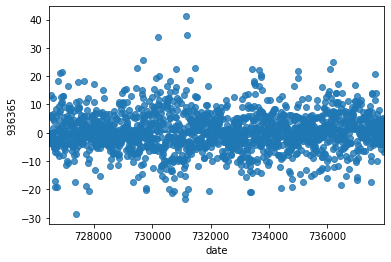

In [64]:
sns.regplot(data=weekly_no_index, x="date", y="936365")

In [65]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
new_df = weekly_no_index[~weekly_no_index["936365"].isna()]
model.fit(X=new_df[["date"]], y=new_df["936365"])

LinearRegression()

In [66]:
print("Line formula for 936365: \nreturn = " + str(model.intercept_) + " + " +
      str(model.coef_[0]) + " * date")

Line formula for 936365: 
return = -21.846821045157913 + 3.0427665472240984e-05 * date


In [67]:
model.predict(pd.DataFrame([[737947]]))[0]

0.6071834070859055

In [68]:
predictions = {}

def linear_predict(stock):
    new_df = weekly_no_index[["date", stock]]
    new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    new_df = new_df[~new_df[stock].isna()]
    if new_df.shape[0] != 0:
        model.fit(X=new_df[["date"]], y=new_df[stock])
        print("Line formula for " + stock + ": \n\treturn = " + str(model.intercept_) + " + " +
              str(model.coef_[0]) + " * date")
        predictions[stock] = model.predict(pd.DataFrame([[737969]]))[0]

In [69]:
current_stocks = weekly_no_index.columns[weekly_no_index.iloc[-1] != 0][1:]

for stock in current_stocks:
    linear_predict(stock)

Line formula for 916328: 
	return = 1.8237969622087267 + -2.160673182118806e-06 * date
Line formula for 936365: 
	return = -21.846821045157913 + 3.0427665472240984e-05 * date
Line formula for 905271: 
	return = -1.194664876694092 + 1.963034096719461e-06 * date
Line formula for 905113: 
	return = -2.3372183214951407 + 3.3925288405958527e-06 * date
Line formula for 905802: 
	return = -12.143692416806738 + 1.683760005030197e-05 * date
Line formula for 905425: 
	return = -9.887413035642494 + 1.3627548445046124e-05 * date
Line formula for 906156: 
	return = -3.6761854967453527 + 5.356033827743527e-06 * date
Line formula for 916305: 
	return = 21.276949212950203 + -2.884751684495059e-05 * date
Line formula for 992816: 
	return = -32.16821645076743 + 4.4601361657954156e-05 * date
Line formula for 921093: 
	return = -3.769930158561297 + 5.384172665131421e-06 * date
Line formula for 905342: 
	return = -23.514241005923505 + 3.236074928593885e-05 * date
Line formula for 702259: 
	return = -18.477

	return = -8.925380613628192 + 1.235475235161747e-05 * date
Line formula for 912212: 
	return = 15.990823639951204 + -2.154538601841276e-05 * date
Line formula for 729935: 
	return = -11.341599741402955 + 1.5858416453882765e-05 * date
Line formula for 905922: 
	return = 13.036957964608847 + -1.765590977028706e-05 * date
Line formula for 902354: 
	return = 10.338140956696506 + -1.3914876107251182e-05 * date
Line formula for 912134: 
	return = 11.784212903796409 + -1.577331133997624e-05 * date
Line formula for 921290: 
	return = -6.3673199648348024 + 8.961880525176994e-06 * date
Line formula for 937343: 
	return = -12.911030412936979 + 1.795434862910603e-05 * date
Line formula for 912402: 
	return = -7.193777732119332 + 1.0114445154761382e-05 * date
Line formula for 929799: 
	return = -35.346153927937614 + 4.8598773167655026e-05 * date
Line formula for 905620: 
	return = 17.57780230293543 + -2.344778580128317e-05 * date
Line formula for 906684: 
	return = -24.23127597955981 + 3.318571970

Line formula for 312385: 
	return = 2.8394751061727597 + -3.457283503914604e-06 * date
Line formula for 749836: 
	return = 14.796216789811101 + -1.9977219964805195e-05 * date
Line formula for 542868: 
	return = 93.79834799760488 + -0.00012742780129783722 * date
Line formula for 357922: 
	return = -22.493271027921104 + 3.094138130752206e-05 * date
Line formula for 916130: 
	return = 3.55920066847433 + -4.671522251856941e-06 * date
Line formula for 741410: 
	return = 11.49495577998633 + -1.5491673648903104e-05 * date
Line formula for 719643: 
	return = 29.736524827283432 + -4.003243263780883e-05 * date
Line formula for 905647: 
	return = 22.226886574150015 + -2.9908727534354924e-05 * date
Line formula for 702635: 
	return = 39.4233019547051 + -5.3138488841933125e-05 * date
Line formula for 999506: 
	return = 24.482625683353884 + -3.2779209994310155e-05 * date
Line formula for 32480Q: 
	return = 4.985393203172151 + -6.5441848787124694e-06 * date
Line formula for 325824: 
	return = 8.04178

Line formula for 357344: 
	return = 78.55087707866532 + -0.00010661330593734015 * date
Line formula for 271980: 
	return = 25.181364039683448 + -3.412238859605089e-05 * date
Line formula for 916532: 
	return = 42.70651318474208 + -5.798371373073717e-05 * date
Line formula for 500373: 
	return = 7.833775140425464 + -1.0295979594093012e-05 * date
Line formula for 906176: 
	return = -1.6938635472195238 + 2.511993272091477e-06 * date
Line formula for 545088: 
	return = 153.16991549038897 + -0.00020956969823925732 * date
Line formula for 255272: 
	return = 75.00003863774491 + -0.00010193032877250295 * date
Line formula for 328184: 
	return = 18.282223532397165 + -2.431060485229944e-05 * date
Line formula for 286738: 
	return = 26.62106034485807 + -3.593891275914975e-05 * date
Line formula for 923649: 
	return = 25.220843601192918 + -3.398153170655402e-05 * date
Line formula for 981722: 
	return = 23.784404639273298 + -3.1978593849042374e-05 * date
Line formula for 328576: 
	return = 64.9674

	return = 126.74908378482128 + -0.0001718039007756138 * date
Line formula for 51245V: 
	return = -19.304710752380625 + 2.6379466315775893e-05 * date
Line formula for 546075: 
	return = 20.24539160779989 + -2.7039130491265098e-05 * date
Line formula for 755980: 
	return = 32.37727194016451 + -4.365437765585055e-05 * date
Line formula for 895705: 
	return = -21.42616911148795 + 2.9538877350173354e-05 * date
Line formula for 28236L: 
	return = 40.39684432400435 + -5.4210202258170564e-05 * date
Line formula for 51937Q: 
	return = -40.77669517465781 + 5.592018882614073e-05 * date
Line formula for 905755: 
	return = 7.668814043256692 + -1.014086785599629e-05 * date
Line formula for 25735K: 
	return = -25.40936541285 + 3.505562074303936e-05 * date
Line formula for 902335: 
	return = -14.902071152345828 + 2.0563265021205674e-05 * date
Line formula for 510209: 
	return = 40.16741482190941 + -5.443617128507434e-05 * date
Line formula for 517465: 
	return = 29.43291693761992 + -3.986553123752614e

Line formula for 923602: 
	return = 13.435907357582547 + -1.7611127580712123e-05 * date
Line formula for 134057: 
	return = 1.7404970957291235 + -2.1200763803642226e-06 * date
Line formula for 9269TG: 
	return = 51.26891053145762 + -6.913585072676969e-05 * date
Line formula for 945411: 
	return = -7.741430964714347 + 1.1015338105640221e-05 * date
Line formula for 14806F: 
	return = 25.519980067114496 + -3.431731505191949e-05 * date
Line formula for 54060C: 
	return = -44.01967069239339 + 6.035611900398709e-05 * date
Line formula for 96699P: 
	return = -357.43067756272006 + 0.00048521057867089226 * date
Line formula for 9801CJ: 
	return = -125.53319817618141 + 0.000170201651083423 * date
Line formula for 9801CK: 
	return = -281.5701873314868 + 0.0003830856082240309 * date
Line formula for 312367: 
	return = 3.3088366051379876 + -3.886455125518553e-06 * date
Line formula for 32730D: 
	return = -4.1593340220578225 + 6.132010624176639e-06 * date
Line formula for 89257J: 
	return = -254.762

	return = -10.284948500077983 + 1.4601380780291995e-05 * date
Line formula for 32521X: 
	return = -54.00069491823098 + 7.404063463114916e-05 * date
Line formula for 325895: 
	return = 29.537433786881703 + -3.979384281801354e-05 * date
Line formula for 8858FM: 
	return = 165.37748627948324 + -0.00022320561246048172 * date
Line formula for 9084MP: 
	return = -135.5508719993754 + 0.0001845629886694977 * date
Line formula for 9664FY: 
	return = 8510.693152463271 + -0.01153338674908166 * date
Line formula for 9664FX: 
	return = 1329.9867780788725 + -0.0018015461985425056 * date
Line formula for 923298: 
	return = -41.008580243117336 + 5.641852380629995e-05 * date
Line formula for 28833V: 
	return = -43.630505983252455 + 6.00235284191847e-05 * date
Line formula for 30241D: 
	return = -97.72956286539363 + 0.00013382997688540747 * date
Line formula for 992765: 
	return = -8.503102576924135 + 1.2084763690047393e-05 * date
Line formula for 277669: 
	return = 7.961725920091386 + -1.02659160366926

In [70]:
# Ordered list of stocks and their predicted returns
sorted_values = sorted(predictions.values(), reverse=True)

sorted_dict = {}
for i in sorted_values:
    for k in predictions.keys():
        if predictions[k] == i:
            sorted_dict[k] = predictions[k]
            break

count = 1
for stock in sorted_dict:
    print(str(count) + ". " + stock + ": " + str(sorted_dict[stock]))
    count += 1

1. 906175: 10.897603762578115
2. 77463M: 3.0527725898091376
3. 15168M: 2.473489697285231
4. 9434UH: 2.361854999513639
5. 9110RA: 1.6243070434935873
6. 69568X: 1.5944002786995952
7. 2605LP: 1.554214539173472
8. 9660J1: 1.5364066832735261
9. 9436NF: 1.3991023304372447
10. 9448Z6: 1.3760758442565475
11. 9113PQ: 1.2560972450362442
12. 9406MC: 1.1357422114494966
13. 9801CK: 1.1351158839930235
14. 9406MA: 1.0880348295534077
15. 68157P: 1.0422022201434231
16. 30241D: 1.0328113467536326
17. 91240W: 1.0045799046224602
18. 13466Q: 0.9891612420323668
19. 921456: 0.935684609198276
20. 7025QJ: 0.8941602893545451
21. 50901M: 0.8443145653066324
22. 28484K: 0.8388926862905492
23. 50394K: 0.8262096760937254
24. 67888X: 0.8147710834676616
25. 9110QF: 0.8014106168086244
26. 8866F3: 0.7779503111995041
27. 871997: 0.776563074535801
28. 992816: 0.7462058105913414
29. 545918: 0.7445898090188408
30. 15303X: 0.740651986999616
31. 89257H: 0.7377898403943846
32. 29235J: 0.7275513680224392
33. 694405: 0.712638876